
<div align="left"><b> IMT Mines Alès (2019-2020)</b></div>



<p><a id="top"></a></p>



<div align="center">
<font face="Times" size="7">Analyse et calcul numériques<br/><br/>
    Exercices corrigés du TD2<br/></font><br/>
<font face="Times" size="4">P. Guyot, X. Picamoles, L. Pissot, E. Rousée</font>
</div>



<div class="alert alert-info">
<font color="black" face="Times" size="6"><b>Table des matières </b></font><br/><br/>
<font color="black" face="Times" size="5"><b><a href="#Exo1"> 1. Fonction définie par une somme et problème d’instabilité
</a></b></font><br/>
<font color="black" face="Times" size="5"><b><a href="#Exo2"> 2. Fonction périodique et développement en série de Fourier</a></b></font><br/>
</div>



<p><a id="Exo1"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info">
<font color="black" size="5"><b>1. Fonction définie par une somme et problème d’instabilité</b></font>
</div>



<p>Import des packages Python</p>


In [1]:

from math import *                # les constantes et fonctions mathématiques
import numpy as np                # le calcul numérique
import matplotlib.pyplot as plt   # l affichage graphique
from scipy.special import jn      # la manipulation des fonctions de Bessel

from IPython.display import Image # pour l'incrustration des images dans le notebook




<h3 id="Exercice-1.">Exercice 1.<a class="anchor-link" href="#Exercice-1.">¶</a></h3><p>Soit <font size="3">$Bessel(x) = \sum_{k=0}^\infty \frac{(-1)^{k}}{(k!)^2} (\frac{x} {2})^{2k}$</font><br/></p>
<p>1) Construire une fonction <code>Bessel(n,x)</code> qui prend en entrée un entier $n$ et un réel $x$ et qui renvoie la valeur de la somme partielle <br/></p><center><font size="3">$Bessel_n(x) = \sum_{k=0}^n \frac{(-1)^{k}}{(k!)^2} (\frac{x} {2})^{2k}$</font></center><br/> Cette fonction sera programmée de manière « naturelle » en traduisant la formule, en particulier en utilisant la fonction d’un entier $n$ en écrivant <code>factorial(n)</code> après l’importation <code>from math import *</code>.<br/> 
Pour les étudiants les plus avancés, un bon exercice est de programmer la fonction factorielle de manière itérative et récursive.
<p>2) Construire une fonction <code>GraphBessel()</code> qui prend en entrée un entier $n$ et deux bornes réelles $a$ et $b$ d’un
intervalle avec $a &lt; b$ et qui renvoie la représentation graphique de $Bessel_n$ sur l’intervalle $[a,b]$. <br/></p>
<p>3) Vérifier que l’appel <code>GraphBessel(50, 0, 35)</code> qui correspond à la représentation graphique de $Bessel_{50}$ sur l’intervalle $[0, 35]$ renvoie la figure 1.</p>


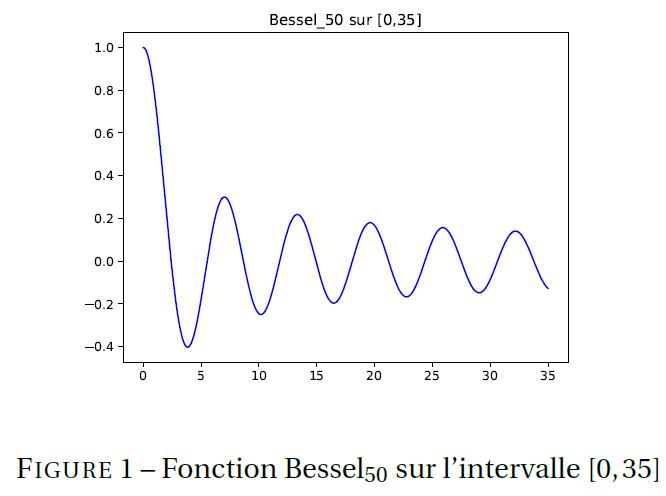

In [2]:

Image(filename="CN1_TD2ex1.jpg", embed=True, width=400, height=400)




<p>4) Vérifier que l’appel <code>GraphBessel(50, 0, 39)</code> qui correspond à la représentation graphique de $Bessel_{50}$ sur l’intervalle $[0, 39]$ renvoie la figure 2. Comment expliquer le résultat ?</p>
<p>5) Calculer $Bessel_{200}(20)$ en utilisant <code>Bessel(200,20)</code> ? Si vous avez un message d’erreur, comment l’interpréter ? Que faut-il en conclure ?</p>
<p>6) Construire une nouvelle fonction <code>Bessel2()</code> qui prend en entrée un entier $n$ et un réel $x$ et qui renvoie la valeur de la somme partielle $Bessel_n(x)$ sans faire appel à la fonction <code>factorial()</code>, c’est-à-dire sans calculer $k!$.</p>
<p>7) Vérifier que le calcul <code>Bessel2(200,20)</code> est maintenant possible et renvoie <code>0.1670246642629062</code>.</p>


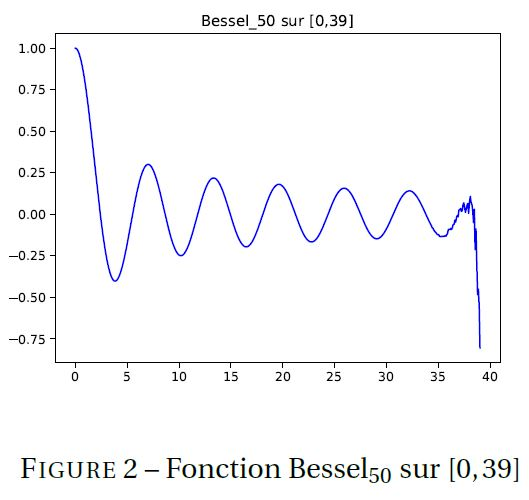

In [3]:

Image(filename="CN1_TD2ex1b.jpg", embed=True, width=350, height=350)




<p>8) Python fournit la fonction native pour calculer la somme infinie <font size="2">$Bessel(x) = \sum_{k=0}^\infty \frac{(-1)^{k}}{(k!)^2} (\frac{x} {2})^{2k}$</font>, c’est la fonction <code>jn()</code> qui s’utilise en écrivant <code>jn(0,x)</code> après avoir fait l’importation <code>from scipy.special import jn</code>.<br/> Représenter graphiquement <code>jn(0,x)</code> sur [0,40] et vérifier que cette fonction n’est pas sensible aux problèmes numériques rencontrés.</p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponses</font></b> :<br/><br/>
<font color="black" face="Times" size="3"><b>1. Code de la fonction </b><font color="black" face="Courier" size="3">Bessel()</font></font>
</div>


In [4]:

## Fonction de Bessel avec factorielle
def Bessel(n, x):
    s = 0
    for k in range(n):
        s += (-1)**k / (factorial(k)**2) * (x/2)**(2*k)
    return s




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>2. Code de la fonction </b><font color="black" face="Courier" size="3">GraphBessel()</font></font>
</div>


In [5]:

def GraphBessel(n, a, b):
    ''' Représentation graphique de la fonction de Bessel avec :
        n : ordre de la somme partielle
        a : borne min de l'intervalle de définition de la fonction Bessel(n, x) pour la variable x
        b : borne max de l'intervalle de définition de la fonction Bessel(n, x) pour la variable x
    '''
    # Controle de conformité des bornes 
    if a >= b:
        return 'Affichage impossible : a >= b'
    
    # Initialiation des données et des variables
    x = np.linspace(a, b, 500)   # liste équirépartie des abscisses à calculer
    y = Bessel(n, x)             # expression factorielle sous forme itérative
    
    # Affichage graphique des résultats
    plt.figure(figsize=(10,6))
    plt.plot(x, y, '-b')
    plt.title(r'$Bessel_{'+str(n)+'}$ sur [0,'+str(b)+']')
    plt.xlabel('$t$'); plt.ylabel(r'$Bessel_{'+str(n)+'}(t)$')



In [6]:

help(GraphBessel)



Help on function GraphBessel in module __main__:

GraphBessel(n, a, b)
    Représentation graphique de la fonction de Bessel avec :
    n : ordre de la somme partielle
    a : borne min de l'intervalle de définition de la fonction Bessel(n, x) pour la variable x
    b : borne max de l'intervalle de définition de la fonction Bessel(n, x) pour la variable x




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>3. Résultat de l'appel </b><font color="black" face="Courier" size="3">GraphBessel(50, 0, 35)</font>($ \Leftrightarrow Bessel_{50}$ sur [0, 35])</font>
</div>


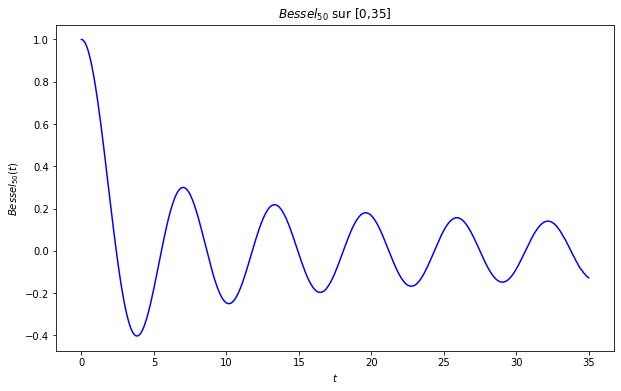

In [7]:

GraphBessel(50, 0, 35)




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>4. Résultat de l'appel </b><font color="black" face="Courier" size="3">GraphBessel(50, 0, 39)</font>($ \Leftrightarrow Bessel_{50}$ sur [0, 39])</font>
</div>


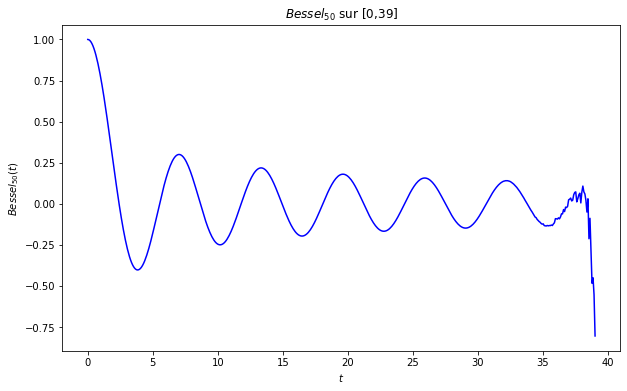

In [8]:

GraphBessel(50, 0, 39)




<p>On observe des oscillations avec l'implémentation itérative de la factorielle à partir de x = 35 vraisemblablement causée par les troncatures numériques effectuées lors du calcul de la fraction $(\frac{x} {k!})^{2k}$ lorsque $x$ et $k$ deviennent grands.</p>



<div class="alert alert-success"><font color="black" face="Times" size="3"><b>5. Résultat de l'appel : </b></font><font color="black">$Bessel_{200}$ sur $[0, 20]$</font></div>


In [9]:

Bessel(200,20)



OverflowError: (34, 'Result too large')


<p>Apparemment, les ressources machines sont insuffisantes pour conduire le calcul au-delà de l'étape 34 (on démarre à 0) de la somme partielle, fonction de $n$.</p>



<div class="alert alert-success"><font color="black" face="Times" size="3"><b>6. Code de la fonction </b><font color="black" face="Courier" size="3">Bessel2()</font></font>
</div>


In [ ]:

## Fonction de Bessel sans la factorielle
def Bessel2(n, x):
    S, P = 1, 1
    for k in range(1, n):
        P *= -(x**2/4) * (1/k**2)
        S += P
    return S




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>7. Résultat de l'appel : </b></font><font color="black">$Bessel2_{200}$ sur $[0, 20]$</font></div>


In [ ]:

Bessel2(200,20)




<p>On propose une fonction d'affichage graphique générique qui prenne en charge la fonction numérique souhaitée :</p>


In [ ]:

def GraphBessel(func, n=0, a=0, b=50):
    ''' Représentation graphique de la fonction de Bessel avec :
        n : ordre de la somme partielle
        a : borne min de l'intervalle de définition de la fonction Bessel(n, x) pour la variable x
        b : borne max de l'intervalle de définition de la fonction Bessel(n, x) pour la variable x
    '''
    # Controle de conformité des bornes 
    if a >= b:
        return 'Affichage impossible : a >= b'
    
    # Initialiation des données et des variables
    x = np.linspace(a, b, 500)   # liste équirépartie des abscisses à calculer
    y = func(n, x)             # expression factorielle sous forme itérative
    
    # Affichage graphique des résultats
    plt.figure(figsize=(10,6))
    plt.plot(x, y, '-b')
    plt.title(r'$Bessel_{'+str(n)+'}$ sur [0,'+str(b)+']')
    plt.xlabel('$t$'); plt.ylabel(r'$Bessel_{'+str(n)+'}(t)$')




<p>Résultats graphiques<br/></p>
<ul>
<li>Fonction de base (à l'aide de <font face="Courier">factorial()</font>)</li>
</ul>


In [ ]:

GraphBessel(Bessel, n=100, a=0, b=40)




<ul>
<li>Fonction intermédiaire (en factorisant le calcul numérique) :</li>
</ul>


In [ ]:

GraphBessel(Bessel2, n=100, a=0, b=40)




<ul>
<li>Fonction native <font face="Courier">scipy.special.jn</font> :</li>
</ul>


In [ ]:

GraphBessel(jn, n=0, a=0, b=40)




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>8. Représentation de </b><font color="black" face="Courier" size="3">jn(0,x)</font> sur [0, 200]</font>
</div>


In [ ]:

# Initialiation des données et des variables
b = 200
x = np.linspace(0, b, 500)

# Affichage graphique des résultats numériques
plt.figure(figsize=(12,6))
plt.plot(x, jn(0,x), 'b', label='natif')
plt.title('Fonction de Bessel native sur [0,'+str(b)+']')
plt.xlabel('$t$'); plt.ylabel(r'$j_n(0,t)$')
plt.legend();




<p>On génère le graphe de bout en bout.</p>



<p><a id="Exo2"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info">
<font color="black" size="5"><b>2. Fonction périodique et développement en série de Fourier</b></font>
</div>



<h3 id="Exercice-2.">Exercice 2.<a class="anchor-link" href="#Exercice-2.">¶</a></h3><p>Soit $f$ une fonction impaire, $2\pi$-périodique définie sur $[0, \pi[$ par <font size="3"> $f(t) = \frac{\pi - t} {2}$</font><br/>
1) Construire une fonction <code>f()</code> qui prend en entrée un réel $t$ et qui renvoie l'image $f(t)$.<br/> <i><b>Indications</b></i> : La fonction doit faire apparaître trois cas :<br/> Cas 1 : Si $t \in [0, \pi[$, dans ce cas on connaît $f(t)$.<br/> Cas 2 : Si $t \in ]-\pi, 0[$, dans ce cas on connaît aussi $f(t)$ car $f$ est impaire.<br/> Cas 3 : Dans tous les autres cas, on se ramène à l’intervalle $[0, \pi[$. Par exemple $f(\frac{5\pi} {2}) = f(2\pi + \frac{\pi} {2}) = f(\frac{\pi} {2})$ ...<br/><br/></p>
<p>2) Vérifier que l’appel <code>f(27)</code> renvoie <code>0.637166941154069</code>et que l’appel <code>f(8*np.pi)</code> renvoie <code>1.5707963267948966</code><br/><br/></p>
<p>3) Tester l’appel <code>f([1,2])</code> et vérifiez si vous obtenez le message suivant <br/> <code>[....] TypeError: '&lt;=' not supported between instances of 'int' and 'list'</code><br/><br/> Tester aussi l’appel <code>f(np.array( [1,2] ))</code> et vérifiez si vous obtenez le message suivant <code>[....] ValueError: The truth value of an array with more than one element is ambiguous.</code><br/> <code>Use a.any() or a.all()</code><br/><br/> Pour éviter ce message d’erreur il faut écrire <code>[ f(x) for x in [1,2] ]</code> <br/> qui renvoie <code>[1.0707963267948966, 0.5707963267948966]</code> ou <code>[ f(x) for x in np.array( [1,2] ) ]</code> qui renvoie le même résultat.<br/><br/></p>
<p>4) Construire une fonction <code>Graphf()</code> qui prend en entrée deux réels $a$ et $b$ avec $a &lt; b$ et qui renvoie la représentation graphique de $f$ sur l’intervalle $[a,b]$.<br/><br/></p>
<p>5) Vérifier que l’appel <code>Graphf(-10,10)</code> renvoie la figure 3.</p>


In [ ]:

Image(filename="CN1_TD2_fig3.jpg", embed=True, width=300, height=300)




<p>6) La théorie des développements en série de Fourier permettrait de démontrer que $\forall t \in$ <font face="Castellar" size="3">R</font> $-\pi$<font face="Castellar" size="3">Z</font>, $f(t) = \sum_{k=1}^{+\infty} \frac{sin(kt)} {k}$ et la somme précédente est appelée le <i>développement en série de Fourier</i> de $f$.<br/> Construire une fonction <code>S()</code> de paramètres $n$ (un entier non nul) et $t$ un réel ou une liste de réels qui renvoie la somme partielle :<br/></p><center> <font size="3">$S_n(t) = \sum_{k=1}^n \frac{sin(kt)} {k}$</font></center> Pour mémoire la fonction sinus doit être appelée en écrivant <code>np.sin</code>.<br/><br/>
<p>7) Vérifier que l’appel <code>S(100,2)</code> renvoie <code>0.5648966828018079</code> et que l’appel <code>S(200,2)</code> renvoie <code>0.569519746419741</code> à comparer à <code>f(2)</code> $\sim$ <code>0,5707963267948966</code>.<br/><br/></p>
<p>8) Construire une fonction <code>GraphfetSn()</code> qui prend en entrée un entier $n$ et deux réels $a$ et $b$ tels que $a &lt; b$ et qui renvoie la représentation graphique des deux fonctions $f$ et $S_n$ sur l’intervalle $[a,b]$.<br/><br/></p>
<p>9) Vérifier que l’appel <code>GraphfetSn(20,-10,10)</code> renvoie la figure 4. Observer aussi les représentations obtenues avec <code>GraphfetSn(10,-10,10)</code> et <code>GraphfetSn(30,-10,10)</code>.<br/><br/></p>
<p>10) Sur un autre graphique, représentez la fonction différence des deux précédentes, toujours sur $[-10,10]$ lorsque
$n = 20$.</p>


In [ ]:

Image(filename="CN1_TD2_fig4.jpg", embed=True, width=300, height=300)




<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponses</font></b> :<br/><br/>
<font color="black" face="Times" size="3"><b>1. Code de la fonction </b><font color="black" face="Courier" size="3">f()</font></font>
</div>


In [ ]:

def f(t):
    if 0 <= t <= np.pi:
        return (np.pi-t)/2    # Définition du motif principal sur [0, pi]
    elif t < 0:
        return -f(-t)         # Prise en compte de la définition de f impaire
    else:
         return f(t-2*np.pi)  # Prise en compte de la définition de la 2-pi périodicité




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>2. Résultat des appels : </b></font><font color="black" face="Courier" size="3">f(27)</font><font color="black" face="Times" size="3"><b> et </b></font><font color="black" face="Courier" size="3">f(8*np.pi)</font></div>


In [ ]:

f(27)



In [ ]:

f(8*np.pi)




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>3. Résultat des appels : </b></font><font color="black" face="Courier" size="3">f([1,2])</font><font color="black" face="Times" size="3"><b> et </b></font><font color="black" face="Courier" size="3">f(np.array( [1,2] ))</font></div>


In [ ]:

f([1,2])



In [ ]:

f(np.array([1,2]))



In [ ]:

[f(x) for x in [1,2]]



In [ ]:

[ f(x) for x in np.array([1,2]) ]




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>4. Code de la fonction </b><font color="black" face="Courier" size="3">Graphf()</font></font>
</div>


In [ ]:

def Graphf(a, b):
    # Grille d'abscisses (300 noeuds de calculs, arbitraire)
    x = np.linspace(a, b, 300)
    
    # Calcul des images
    y = [f(X) for X in x]  # via list comprehension !
    
    # Graphique
    plt.plot(x,y)
    plt.title(r'CN2 - Exercice 2.4 : Graphe de $f(t) = \frac{\pi - t} {2}$ sur ['+str(a)+','+str(b)+']', fontsize=12, pad=10)
    plt.xlabel(r'$t$'); plt.ylabel(r'$f(t)$');




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>5. Résultat de l'appel </b><font color="black" face="Courier" size="3">Graphf(-10, 10)</font></font>
</div>


In [ ]:

Graphf(-10, 10)




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>6. Code de la fonction </b><font color="black" face="Courier" size="3">S()</font></font>
</div>


In [ ]:

def S(n, t):
    s = 0
    for k in range(1, n+1):    # la somme partielle entre 1 et n
        s += np.sin(k*t)/k
    return s




<p>Version optimisée avec <font face="Courier">list comprehension</font></p>


In [ ]:

def S2(n, t):
    return np.sum([np.sin(k*t)/k for k in range(1, n+1)])




<div class="alert alert-success">
<font color="black" face="Times" size="3"><b>7. Résultats de l'appel : </b></font>
<font color="black" face="Courier" size="3">S(100,2), S(200,2)</font>
<font color="black" face="Times" size="3"><b> et </b></font>
<font color="black" face="Courier" size="3">f(2)/0.5707963267948966</font>
</div>


In [ ]:

S(100,2)



In [ ]:

S(200,2)




<p>Résultat obtenu avec la <font face="Courier">list comprehension</font></p>


In [ ]:

S2(100,2)



In [ ]:

S2(200,2)




<p>On remarque un léger écart numérique entre les 2 résultats obtenus.<br/> De l'ordre de $35\times10^{-16}$ si $n = 200$</p>


In [ ]:

f(2)




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>8. Code de la fonction </b><font color="black" face="Courier" size="3">GraphfetSn()</font></font>
</div>


In [ ]:

def GraphfetSn(n, a, b):
    # Grille d'abscisses (300 noeuds de calculs, arbitraire)
    x = np.linspace(a, b, 300)

    # Calcul des images
    y = [f(X) for X in x]     # ordonnées correspondantes à l'appel de la fonction numérique f (exacte)
    yn = [S(n,X) for X in x]  # ordonnées correspondantes à l'appel de l'expression du DL (approchée) 

    # Affichage graphique des résultats numériques
    plt.figure(figsize=(20,6))
    plt.plot(x, yn, '-r', label=r'$S_{'+str(n)+'}$')
    plt.plot(x, y, '-g', label=r'$f$')
    plt.title(r'CN2 - Exercice 2.8 : Comparaison de $S_n(t)$ et $f(t)$',fontsize=15, pad=15)
    plt.xlabel(r'$t$'); plt.ylabel(r'$y$');
    plt.text(a-0.7, 1.5, r'$S_n(t) = \sum_{k=1}^{n} \frac{sin(kt)}{k}$ pour $n = '+str(n)+'$',fontsize=12)
    plt.text(a-0.7, 1.0, r'$f(t) = \frac{\pi - t} {2}$',fontsize=13)
    plt.legend(loc='best');    




<div class="alert alert-success"><font color="black" face="Times" size="3"><b>9. Représentation graphique des résultats de l'appel de la fonction </b><font color="black" face="Courier" size="3">S(n, t)</font></font><font color="black" face="Times" size="3"><b>sur l’intervalle $[-10, 10]$ pour $n \in$ {10,20,30}</b></font>
</div>


In [ ]:

GraphfetSn(20,-10,10)



In [ ]:

GraphfetSn(10,-10,10)



In [ ]:

GraphfetSn(30,-10,10)




<p>Les oscillations numériques diminuent avec $n$ et $S_n(t)$ tend vers $f(t)$</p>



<div class="alert alert-success"><font color="black" face="Times" size="3"><b>10. Sur un autre graphique, représentez la fonction différence des deux précédentes, toujours sur l’intervalle $[-10, 10]$ lorsque $n = 20$</b></font>
</div>


In [ ]:

# Initialisation
x = np.arange(-10, 10, 0.1)
err = []  # vecteur des ecarts entre S(n,t) et f(t)
n = 20

# Calculs
y = [f(xx) for xx in x]            # valeurs de f(x) sur l'intervalle d étude souhaité
err = [f(xx)-S(n,xx) for xx in x]  # mesure des écarts entre f et Sn
texte = '$f(t) - \sum_{k=1}^{'+str(n)+'} \\frac{sin(kt)}{k}$'

# Affichage graphique des résultats numériques
plt.figure(figsize=(20,8))
plt.plot(x, err, '-b', label=r'$f(t) - S_{'+str(n)+'}(t)$')
plt.title(r'CN2 - Exercice 2.10 : '+texte,fontsize=15, pad=15)
plt.xlabel(r'$t$'); plt.ylabel(r'$f(t) - S('+str(n)+',t)$');
plt.plot(-2*np.pi, 0,'or',markersize=12, label='($-2\pi, 0$)'); plt.plot(0, 0,'ok',markersize=12, label='(0, 0)'); 
plt.plot(2*np.pi, 0,'og',markersize=12, label='($2\pi, 0$)')
plt.text(0.,0.2,'M(0,0)',fontsize=14,color="red")
plt.text(-2*pi-0.25,0.2,'$M(-2\pi,0)$',fontsize=14,color="red")
plt.text(2*pi-0.1,-0.3,'$M(2\pi,0)$',fontsize=14,color="red")
plt.legend();




<p>Les oscillations sont concentrées autour de valeurs caractéristiques proportionnelles à $2k \pi$.</p>
